<a href="https://colab.research.google.com/github/m-shilpa/ethereum-data-analysis/blob/master/OrderBy/Data_Analytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
centroids = pd.read_csv(r'/content/gdrive/My Drive/data/df_summary.csv')

In [ ]:

centroids.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
centroids

,Unnamed: 0,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,eth_balance,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,cluster_size
0,0,3.077536,5.850659e-17,2.422174,9.050241e-17,4.279194e-17,1.278214e-10,1.063981e-11,1.796796e+64,1.302882e+61,3.850042,0.894165,0.578915,7.641658e-18,1.261787e-17,16322
1,6,6.907277,6.086306e-16,2.936024,4.184840e-16,5.896962e-17,2.562137e-07,2.725586e-10,2.967637e+60,6.228233e+43,5.519725,1.327238,0.602277,4.827191e-17,3.313747e-17,12027
2,1,4.523602,1.452671e-16,2.486275,1.514907e-16,5.634879e-17,2.295143e-10,6.902368e-11,1.834274e+34,5.509040e+35,2.340594,1.347248,0.685987,4.375181e-17,5.063127e-17,9399
3,8,1.133963,1.848783e-18,1.796999,3.388693e-17,3.245964e-17,8.008632e-11,3.091282e-12,1.050068e+40,2.424185e+05,1.939922,0.788280,0.588969,7.314774e-19,1.489079e-17,5927
4,3,3.500333,1.840070e-16,0.986836,8.812158e-17,5.196388e-17,8.709913e-11,5.324892e-11,6.123433e+05,9.911131e+40,2.376037,1.143497,0.526602,4.781073e-17,3.101031e-17,5286
5,5,6.344004,1.853241e-15,2.448994,2.180807e-15,1.369257e-15,4.536760e+00,9.020621e-09,8.420554e+55,1.039301e+43,4.634659,1.329065,0.598683,2.343439e-16,4.000420e-16,892
6,7,8.284382,1.059215e-15,2.554105,6.331374e-16,1.161270e-16,3.700753e+00,2.322719e-01,7.899311e+49,2.678829e+35,4.829043,1.536482,0.607653,7.733320e-17,4.371306e-17,125
7,4,3.347425,9.742262e-15,1.784480,7.423976e-14,7.330155e-14,3.019687e+00,2.267586e-12,2.185567e+27,1.443018e+37,2.823381,1.082798,0.619354,1.040145e-15,2.270273e-14,16
8,9,6.933531,4.854771e-13,3.402289,4.180536e-13,1.669587e-14,4.083943e-01,8.051863e-12,1.515517e+44,2.443578e+30,4.093560,1.460896,0.670710,7.611572e-14,7.402689e-14,5
9,2,21.769767,9.429556e-12,12.672961,7.140031e-12,1.991347e-15,2.741090e-09,3.242307e-15,8.294179e+02,2.894910e+05,17.225070,1.990966,0.806392,2.142600e-13,1.623090e-13,1


In [ ]:
df_radar = centroids

In [ ]:
df_radar.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [ ]:
df_radar['label'] = df_radar['Unnamed: 0']

In [ ]:
df_radar = df_radar.reset_index()

In [ ]:
df_radar.set_index('label', inplace=True)

In [ ]:
df_radar[df_radar<0] = 0

In [ ]:
#log scale
df_radar = np.log1p(df_radar)+1

In [ ]:
df_radar

,index,Unnamed: 0,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,eth_balance,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,cluster_size
label,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,2.405493,1.0,2.230276,1.0,1.0,1.000000,1.00000,148.951451,141.722269,2.578987,1.638778,1.456738,1.0,1.0,10.700330
6,1.693147,2.945910,3.067783,1.0,2.370171,1.0,1.0,1.000000,1.00000,140.242872,101.840252,2.874832,1.844682,1.471426,1.0,1.0,10.394993
1,2.098612,1.693147,2.709030,1.0,2.248834,1.0,1.0,1.000000,1.00000,79.894542,83.296869,2.206149,1.853244,1.522351,1.0,1.0,10.148465
8,2.386294,3.197225,1.757981,1.0,2.028547,1.0,1.0,1.000000,1.00000,93.152259,13.398425,2.078383,1.581254,1.463086,1.0,1.0,9.687442
3,2.609438,2.386294,2.504151,1.0,1.686544,1.0,1.0,1.000000,1.00000,14.325050,95.397062,2.216703,1.762439,1.423044,1.0,1.0,9.573006
5,2.791759,2.791759,2.993884,1.0,2.238083,1.0,1.0,2.711409,1.00000,129.772856,100.049708,2.728937,1.845467,1.469180,1.0,1.0,7.794587
7,2.945910,3.079442,3.228334,1.0,2.268103,1.0,1.0,2.547723,1.20886,115.893445,82.575858,2.762853,1.930778,1.474775,1.0,1.0,5.836282
4,3.079442,2.609438,2.469584,1.0,2.024061,1.0,1.0,2.391204,1.00000,63.951673,86.562385,2.341135,1.733712,1.482027,1.0,1.0,3.833213
9,3.197225,3.302585,3.071098,1.0,2.482125,1.0,1.0,1.342450,1.00000,102.729501,70.971016,2.627977,1.900525,1.513249,1.0,1.0,2.791759


In [ ]:
df_radar = df_radar.drop("Unnamed: 0",axis = 1,)
df_radar

,index,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,eth_balance,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,cluster_size
label,,,,,,,,,,,,,,,,
0,1.000000,2.405493,1.0,2.230276,1.0,1.0,1.000000,1.00000,148.951451,141.722269,2.578987,1.638778,1.456738,1.0,1.0,10.700330
6,1.693147,3.067783,1.0,2.370171,1.0,1.0,1.000000,1.00000,140.242872,101.840252,2.874832,1.844682,1.471426,1.0,1.0,10.394993
1,2.098612,2.709030,1.0,2.248834,1.0,1.0,1.000000,1.00000,79.894542,83.296869,2.206149,1.853244,1.522351,1.0,1.0,10.148465
8,2.386294,1.757981,1.0,2.028547,1.0,1.0,1.000000,1.00000,93.152259,13.398425,2.078383,1.581254,1.463086,1.0,1.0,9.687442
3,2.609438,2.504151,1.0,1.686544,1.0,1.0,1.000000,1.00000,14.325050,95.397062,2.216703,1.762439,1.423044,1.0,1.0,9.573006
5,2.791759,2.993884,1.0,2.238083,1.0,1.0,2.711409,1.00000,129.772856,100.049708,2.728937,1.845467,1.469180,1.0,1.0,7.794587
7,2.945910,3.228334,1.0,2.268103,1.0,1.0,2.547723,1.20886,115.893445,82.575858,2.762853,1.930778,1.474775,1.0,1.0,5.836282
4,3.079442,2.469584,1.0,2.024061,1.0,1.0,2.391204,1.00000,63.951673,86.562385,2.341135,1.733712,1.482027,1.0,1.0,3.833213
9,3.197225,3.071098,1.0,2.482125,1.0,1.0,1.342450,1.00000,102.729501,70.971016,2.627977,1.900525,1.513249,1.0,1.0,2.791759


In [ ]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

In [ ]:
ls = list(df_radar)[1:-1]

In [ ]:
df_radar.columns

Index(['index', 'no_of_out_transactions', 'tot_ether_sent',
       'no_of_in_transactions', 'tot_ether_recieved', 'eth_balance',
       'tot_token_value_recieved', 'tot_token_value_sent', 'time_b/w_in_txn',
       'time_b/w_out_txn', 'active_months', 'monthly_out_txn',
       'monthly_in_txn', 'monthly_ether_sent', 'monthly_ether_recieved',
       'cluster_size'],
      dtype='object')

In [ ]:
feats = ['no_of_in_transactions', 'tot_ether_recieved', 'eth_balance',
       'no_of_out_transactions', 'tot_ether_sent', 'tot_token_value_recieved',
       'tot_token_value_sent', 'time_b/w_in_txn', 'time_b/w_out_txn',
       'active_months', 'monthly_out_txn', 'monthly_in_txn',
       'monthly_ether_sent', 'monthly_ether_recieved' ]

In [ ]:
d = {feats[i]:chr(65+i) for i in range(len(feats))}

In [ ]:
d

{'active_months': 'J',
 'eth_balance': 'C',
 'monthly_ether_recieved': 'N',
 'monthly_ether_sent': 'M',
 'monthly_in_txn': 'L',
 'monthly_out_txn': 'K',
 'no_of_in_transactions': 'A',
 'no_of_out_transactions': 'D',
 'time_b/w_in_txn': 'H',
 'time_b/w_out_txn': 'I',
 'tot_ether_recieved': 'B',
 'tot_ether_sent': 'E',
 'tot_token_value_recieved': 'F',
 'tot_token_value_sent': 'G'}

In [ ]:

dfr = df_radar[feats]

In [ ]:
#setting up color ma
import matplotlib.pyplot as plt
NUM_COLORS = 10
cmp = plt.get_cmap('viridis', 3)

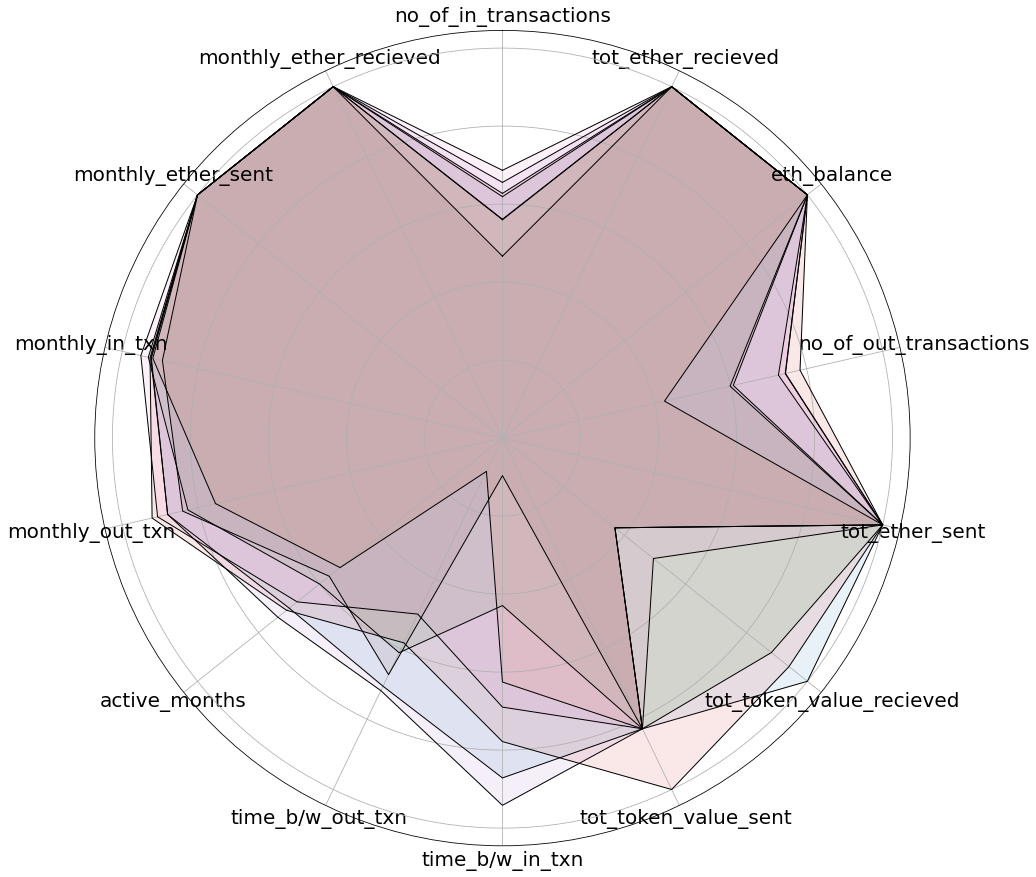

In [ ]:
# Libraries
import matplotlib.pyplot as plt

from math import pi

 
fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(dfr)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
#ax.set_color_cycle([cmp(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=20)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(7):
    # Ind1
    lbl = df_radar.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='k', label=lbl)
    ax.fill(angles, values, alpha=0.1)


In [ ]:
data_with_clusters =  pd.read_csv(r'/content/gdrive/My Drive/data/data_with_labels.csv')


In [ ]:
data_with_clusters.drop(columns = ['address','Unnamed: 0'])
labels_ = list(data_with_clusters['labels'])

In [ ]:
total_eth = {}
total_addresses = {}

for clust in np.unique(labels_):
    mask = labels_==clust
    eth = np.sum(data_with_clusters[mask]['eth_balance'])
    size = np.sum(labels_==clust)
    total_eth[clust] = eth
    total_addresses[clust] = size

In [ ]:

names = np.array(list(total_eth.keys()))
values = np.array(list(total_eth.values()))
indices = np.argsort(values)

names = names[indices][::-1]
values = values[indices][::-1]

In [ ]:
names
dfr=dfr.loc[names]


In [ ]:
names.sort()

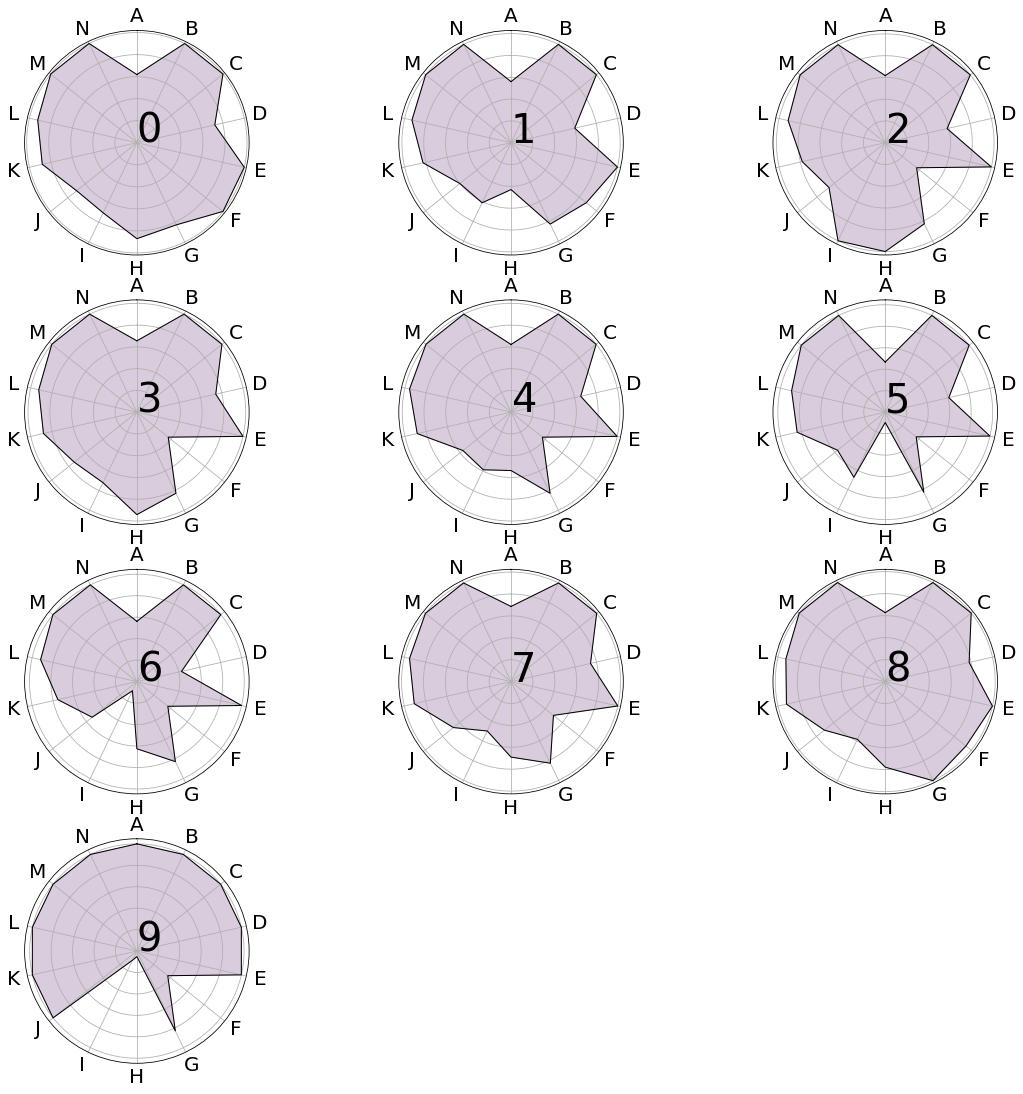

In [ ]:
import matplotlib as mpl

from pylab import *

fig = plt.figure(figsize=(19,19))
# ------- PART 1: Create background

# number of variable
categories=list(dfr)
categories=list(d.values())
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i,c in enumerate(names):
    rgb = cmp(0)[:3] # will return rgba, we take only first 3 so we get rgb
    # Initialise the spider plot
    ax = plt.subplot(4,3,i+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.xticks(fontsize=20)
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    # plt.ylim(0,40)
    ax.set_yticklabels([])
     #hide labels
#     ax.set_xticklabels([])
 
# # Plot each individual = each line of the data
 

    lbl = dfr.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,c='k', linestyle='solid')
    ax.fill(angles, values, alpha=0.2,c=rgb, label=lbl)
    fnt=40
    
    ax.text(1,0, str(lbl), fontsize=fnt)

In [ ]:
dfdf = pd.DataFrame(pd.Series(d))

In [ ]:
dfdf.sort_values(by=0)

,0
no_of_in_transactions,A
tot_ether_recieved,B
eth_balance,C
no_of_out_transactions,D
tot_ether_sent,E
tot_token_value_recieved,F
tot_token_value_sent,G
time_b/w_in_txn,H
time_b/w_out_txn,I
active_months,J


In [ ]:
names

array([5, 4, 0, 6, 1, 3, 8, 9, 7, 2])